In [1]:
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from bs4 import BeautifulSoup
import pandas as pd
import time

In [3]:
!apt-get update
!apt-get install -y chromium-browser chromium-chromedriver
!pip install selenium bs4 pandas

'apt-get'은(는) 내부 또는 외부 명령, 실행할 수 있는 프로그램, 또는
배치 파일이 아닙니다.
'apt-get'은(는) 내부 또는 외부 명령, 실행할 수 있는 프로그램, 또는
배치 파일이 아닙니다.


In [37]:
import pandas as pd
import matplotlib.pyplot as plt

# 데이터 불러오기
batter_df = pd.read_csv(r"C:\Users\NT551_11TH\Downloads\batter_stat_2025.csv", encoding="cp949")
salary_df = pd.read_csv(r"C:\Users\NT551_11TH\Downloads\player_salary.csv", encoding="cp949")


# 필요한 컬럼 추출 및 이름 정리
batter_df = batter_df[["선수명", "팀명", "WAR", "타석"]]
salary_df = salary_df[["name", "team", "salary"]]
salary_df.rename(columns={"name": "선수명", "team": "팀명"}, inplace=True)

# 연봉 숫자형 변환
salary_df["salary"] = salary_df["salary"].replace(",", "", regex=True)
salary_df["salary"] = pd.to_numeric(salary_df["salary"], errors="coerce")

# 연봉 매칭
batter_merged = pd.merge(batter_df, salary_df, on=["선수명", "팀명"])

# 평균 연봉 계산
mean_salary = batter_merged["salary"].mean()

# WAR 대비 연봉 계산
batter_merged["WAR_per_salary"] = batter_merged["WAR"] / batter_merged["salary"]

# 돈 값 못하는 선수 TOP 10 (평균 연봉 이상만 포함)
worst_batters = batter_merged[batter_merged["salary"] >= mean_salary]
worst_batters = worst_batters.sort_values("WAR_per_salary").head(10)

# 돈 값 잘하는 선수 TOP 10 (타석 >= 300)
best_batters = batter_merged[batter_merged["타석"] >= 300]
best_batters = best_batters.sort_values("WAR_per_salary", ascending=False).head(10)


In [30]:
best_batters

,선수명,팀명,WAR,타석,salary,WAR_per_salary
0,안현민,KT,5.62,406,3300.0,0.001703
6,김성윤,삼성,4.36,454,7000.0,0.000623
46,오선우,KIA,1.43,398,3400.0,0.000421
63,오명진,두산,1.04,345,3100.0,0.000335
21,문현빈,한화,2.61,510,8800.0,0.000297
27,김호령,KIA,2.28,307,8000.0,0.000285
2,김주원,NC,5.07,533,20000.0,0.000254
23,김형준,NC,2.57,347,11000.0,0.000234
10,신민재,LG,3.46,457,20000.0,0.000173
62,이진영,한화,1.04,324,6200.0,0.000168


In [38]:
worst_batters

,선수명,팀명,WAR,타석,salary,WAR_per_salary
236,안치홍,한화,-1.69,172,50000.0,-0.000034
229,배정대,KT,-0.61,272,34000.0,-0.000018
222,최원준,KIA,-0.51,245,40000.0,-0.000013
226,박세혁,NC,-0.54,72,60000.0,-0.000009
214,심우준,한화,-0.41,227,50000.0,-0.000008
106,강승호,두산,0.11,352,37000.0,0.000003
105,양석환,두산,0.11,263,30000.0,0.000004
91,노진혁,롯데,0.27,56,70000.0,0.000004
89,손아섭,NC,0.29,268,50000.0,0.000006
51,로하스,KT,1.32,388,210000.0,0.000006


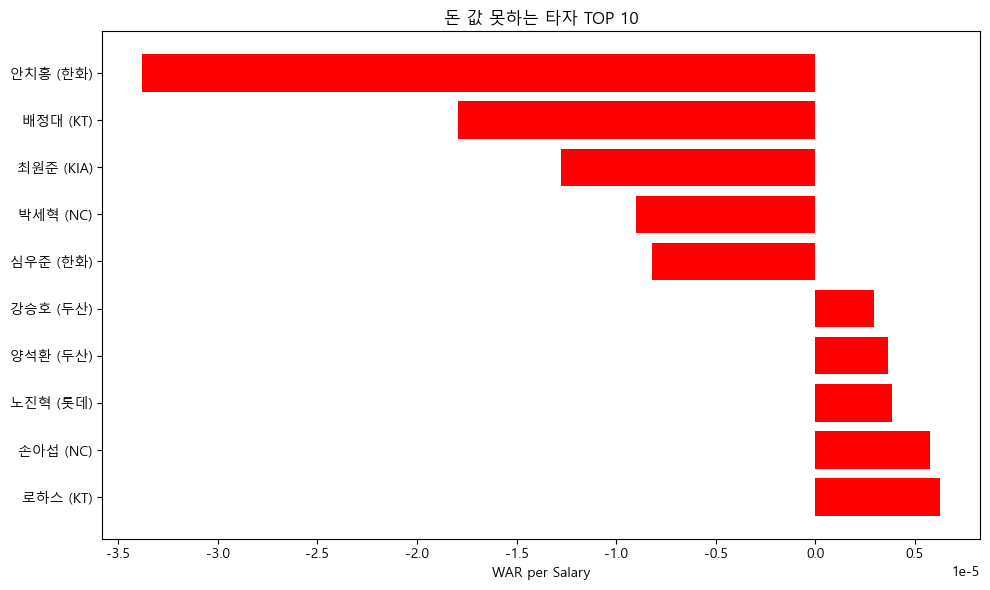

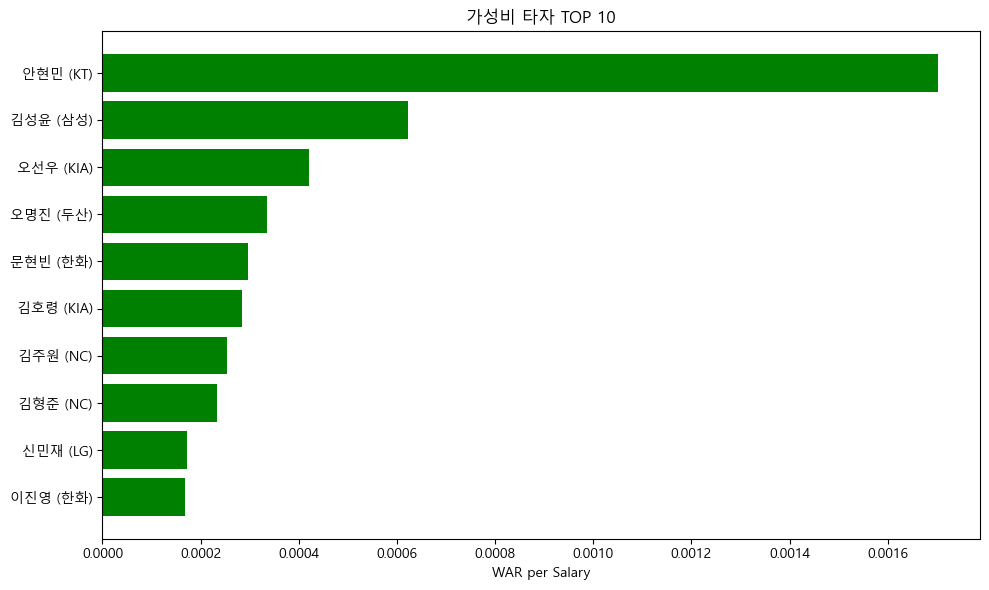

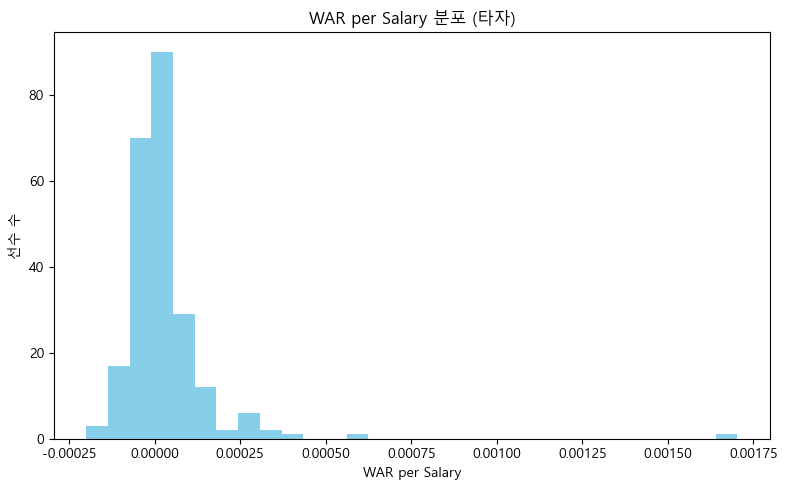

In [39]:
# 시각화
plt.figure(figsize=(10, 6))
labels = worst_batters["선수명"] + " (" + worst_batters["팀명"] + ")"
plt.barh(labels, worst_batters["WAR_per_salary"], color="red")
plt.title("돈 값 못하는 타자 TOP 10")
plt.xlabel("WAR per Salary")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
labels = best_batters["선수명"] + " (" + best_batters["팀명"] + ")"
plt.barh(labels, best_batters["WAR_per_salary"], color="green")
plt.title("가성비 타자 TOP 10")
plt.xlabel("WAR per Salary")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

# 전체 분포 시각화
plt.figure(figsize=(8, 5))
plt.hist(batter_merged["WAR_per_salary"], bins=30, color="skyblue")
plt.title("WAR per Salary 분포 (타자)")
plt.xlabel("WAR per Salary")
plt.ylabel("선수 수")
plt.tight_layout()
plt.show()


In [3]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import platform

# 시스템에 따라 폰트 설정
if platform.system() == "Windows":
    plt.rcParams["font.family"] = "Malgun Gothic"  # 윈도우 기본 한글 폰트
elif platform.system() == "Darwin":  # macOS
    plt.rcParams["font.family"] = "AppleGothic"
else:  # 리눅스
    plt.rcParams["font.family"] = "NanumGothic"

# 마이너스 기호 깨짐 방지
plt.rcParams["axes.unicode_minus"] = False


In [10]:
# 데이터 불러오기
pitcher_df = pd.read_csv(r"C:\Users\NT551_11TH\Downloads\pitcher_stat_2025.csv", encoding="cp949")

# 필요한 컬럼 추출 및 이름 정리
pitcher_df = pitcher_df[["선수명", "팀명", "FIP-WAR", "이닝"]]

# 연봉 매칭
pitcher_merged = pd.merge(pitcher_df, salary_df, on=["선수명", "팀명"])

# 평균 연봉 계산
mean_salary_pitcher = pitcher_merged["salary"].mean()

# WAR 대비 연봉 계산
pitcher_merged["WAR_per_salary"] = pitcher_merged["FIP-WAR"] / pitcher_merged["salary"]

# 돈 값 못하는 선수 TOP 10 (평균 연봉 이상만 포함)
worst_pitchers = pitcher_merged[pitcher_merged["salary"] >= mean_salary_pitcher]
worst_pitchers = worst_pitchers.sort_values("WAR_per_salary").head(10)

# 돈 값 잘하는 선수 TOP 10 (이닝 >= 100)
best_pitchers = pitcher_merged[pitcher_merged["이닝"] >= 100]
best_pitchers = best_pitchers.sort_values("WAR_per_salary", ascending=False).head(10)


In [52]:
worst_pitchers

,선수명,팀명,FIP-WAR,이닝,salary,WAR_per_salary
216,박종훈,SSG,-0.70,19.0,110000.0,-6.363636e-06
188,홍건희,두산,-0.17,13.1,30000.0,-5.666667e-06
178,주현상,한화,-0.12,36.1,25000.0,-4.800000e-06
176,서진용,SSG,-0.11,1.1,38000.0,-2.894737e-06
173,문승원,SSG,-0.10,95.1,80000.0,-1.250000e-06
157,오승환,삼성,-0.04,8.2,80000.0,-5.000000e-07
149,쿠에바스,KT,-0.02,98.1,140000.0,-1.428571e-07
115,한현희,롯데,0.06,8.2,100000.0,6.000000e-07
130,구승민,롯데,0.02,6.0,30000.0,6.666667e-07
128,임기영,KIA,0.03,9.0,30000.0,1.000000e-06


In [53]:
best_pitchers

,선수명,팀명,FIP-WAR,이닝,salary,WAR_per_salary
27,송승기,LG,2.20,123.1,3600.0,0.000611
9,문동주,한화,4.32,107.2,10000.0,0.000432
21,나균안,롯데,2.64,130.0,12000.0,0.000220
14,손주영,LG,3.63,133.0,17200.0,0.000211
31,최승용,두산,1.77,106.2,8500.0,0.000208
8,소형준,KT,4.51,130.0,22000.0,0.000205
23,오원석,KT,2.52,120.2,14000.0,0.000180
36,김도현,KIA,1.58,120.0,9000.0,0.000176
16,임찬규,LG,3.37,144.1,20000.0,0.000169
34,최원태,삼성,1.69,114.2,20000.0,0.000084


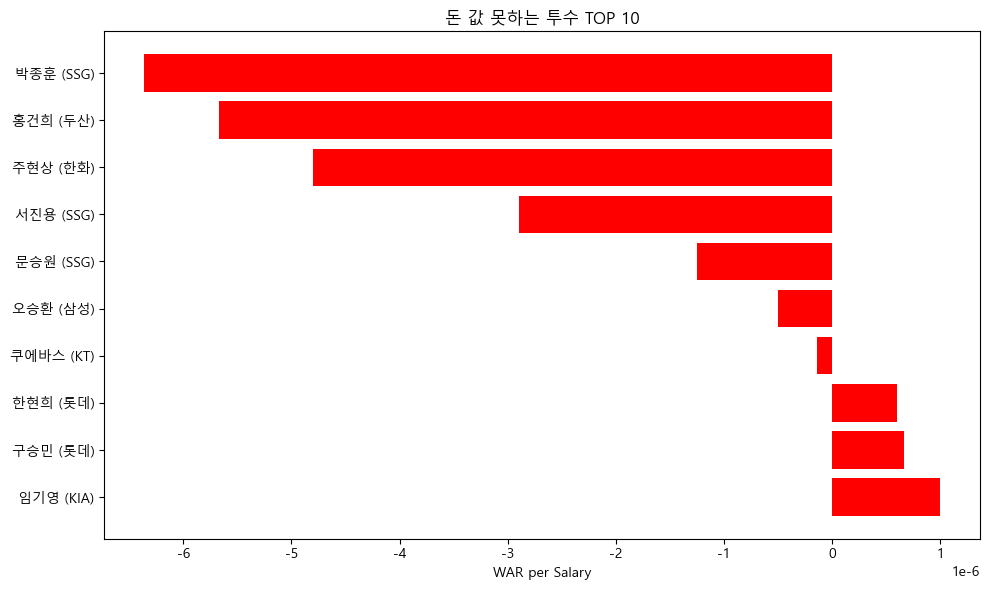

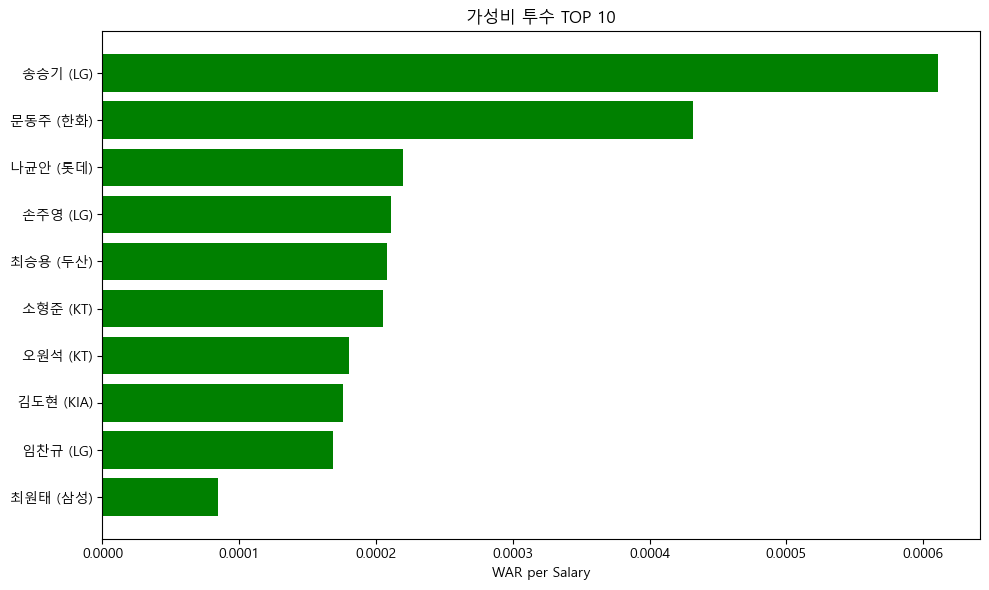

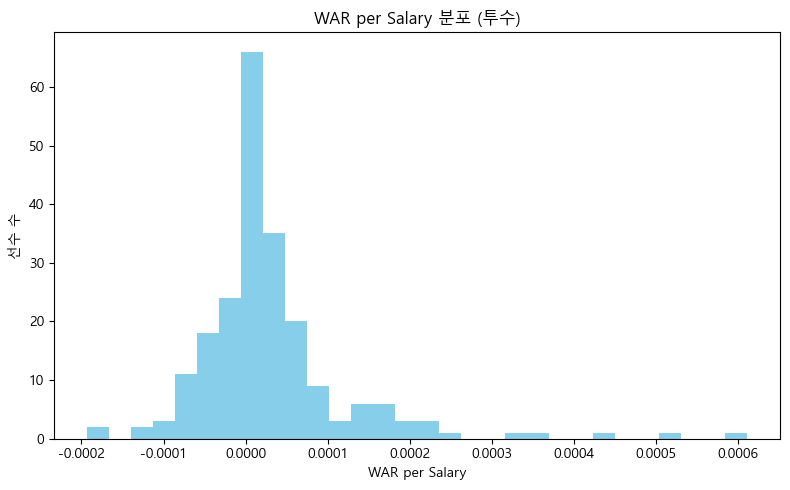

In [40]:
# 시각화
plt.figure(figsize=(10, 6))
labels = worst_pitchers["선수명"] + " (" + worst_pitchers["팀명"] + ")"
plt.barh(labels, worst_pitchers["WAR_per_salary"], color="red")
plt.title("돈 값 못하는 투수 TOP 10")
plt.xlabel("WAR per Salary")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
labels = best_pitchers["선수명"] + " (" + best_pitchers["팀명"] + ")"
plt.barh(labels, best_pitchers["WAR_per_salary"], color="green")
plt.title("가성비 투수 TOP 10")
plt.xlabel("WAR per Salary")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

# 전체 분포 시각화
plt.figure(figsize=(8, 5))
plt.hist(pitcher_merged["WAR_per_salary"], bins=30, color="skyblue")
plt.title("WAR per Salary 분포 (투수)")
plt.xlabel("WAR per Salary")
plt.ylabel("선수 수")
plt.tight_layout()
plt.show()


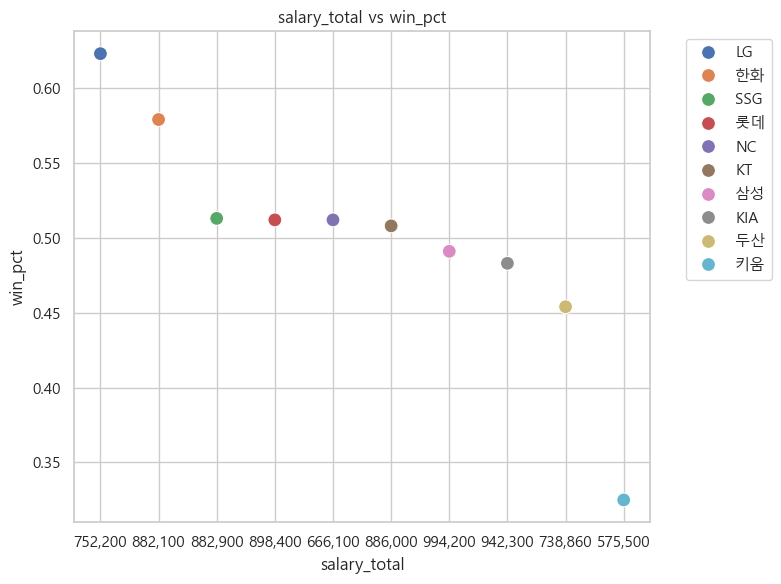

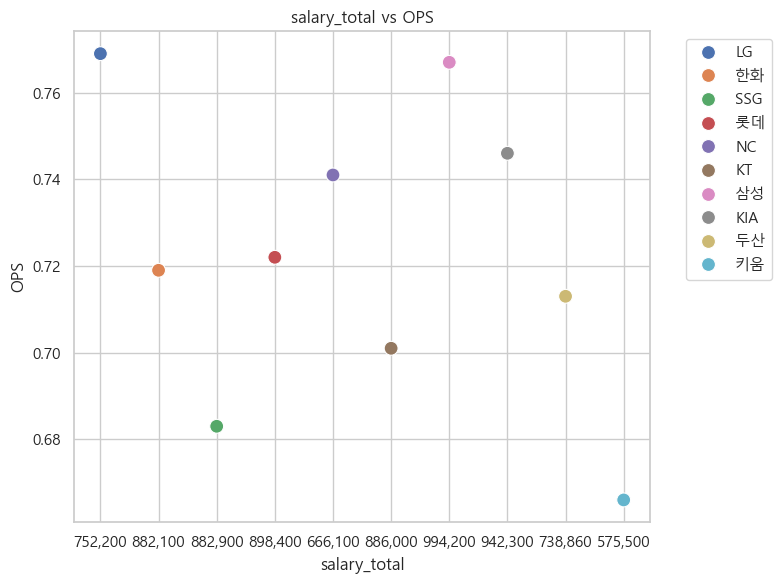

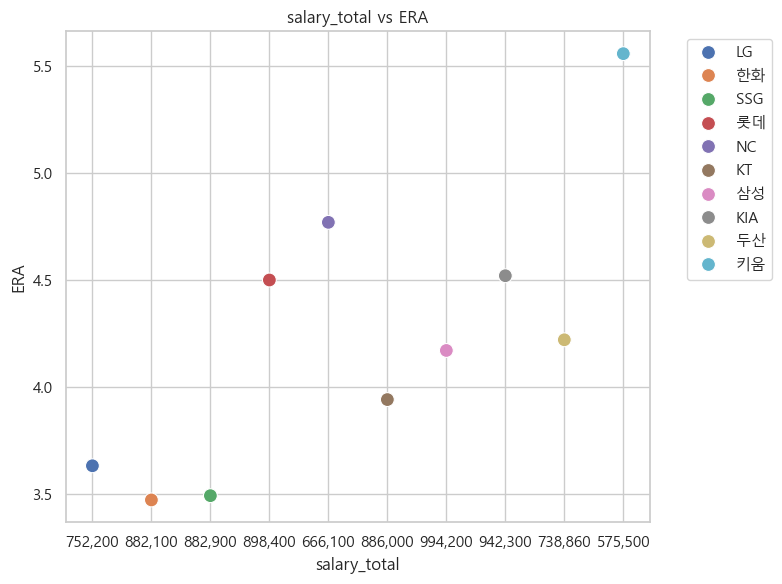

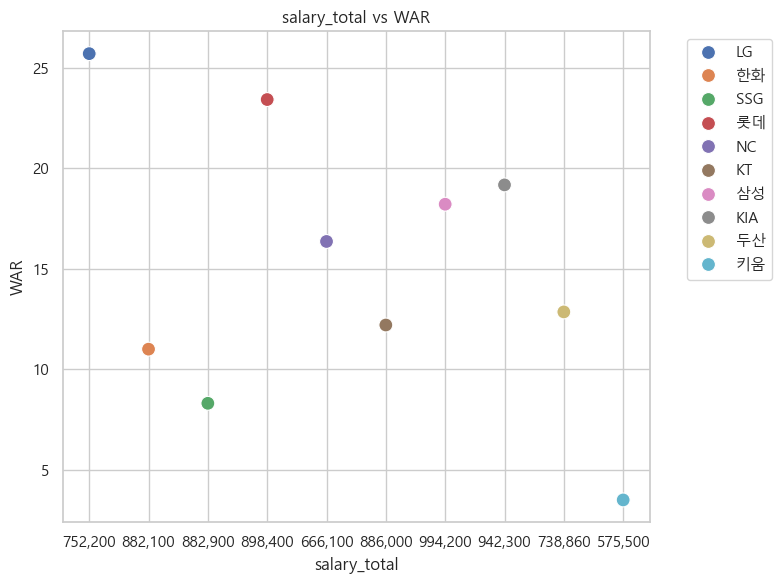

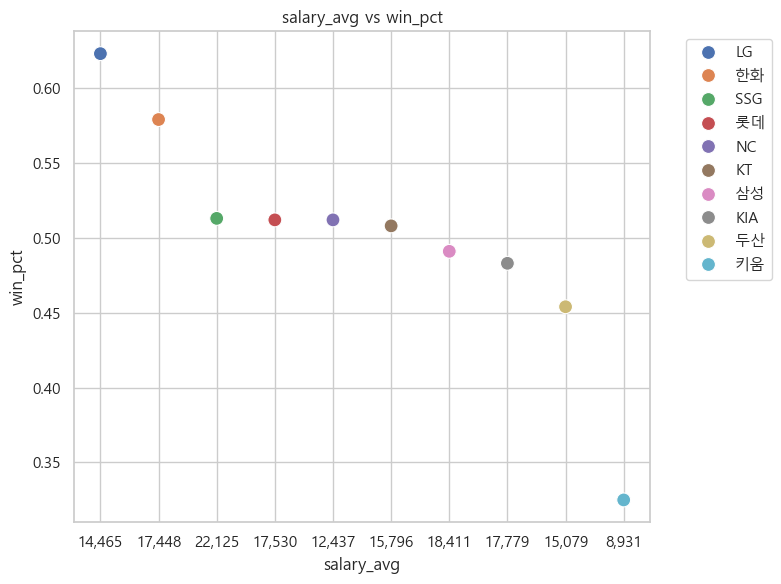

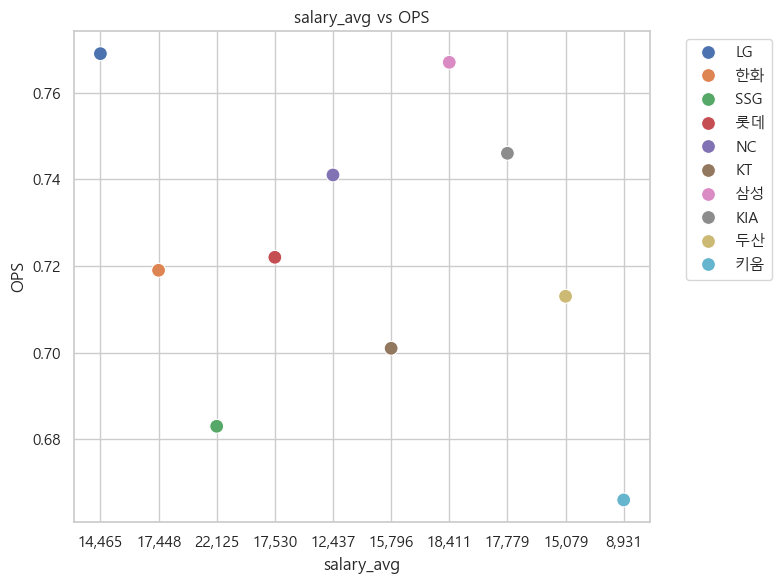

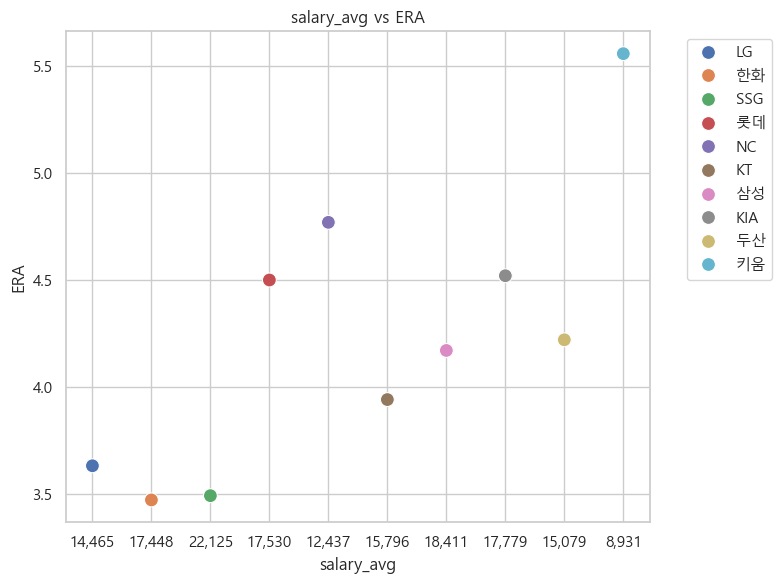

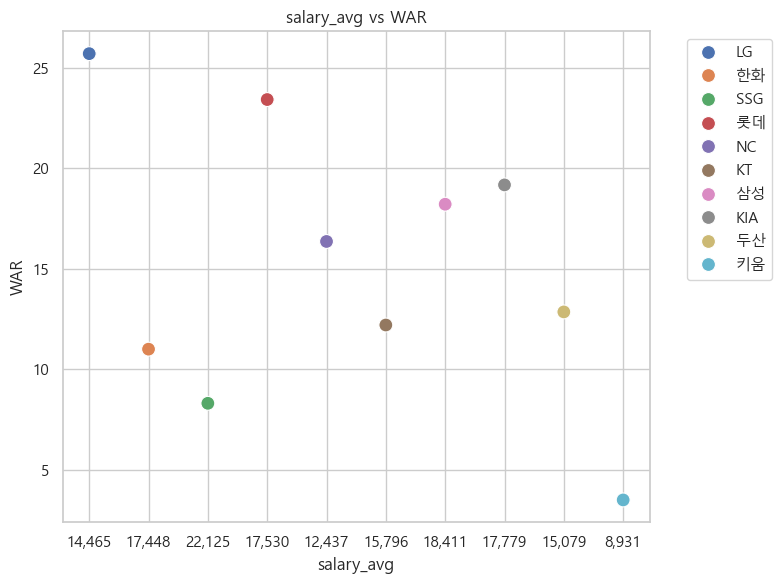

C:\Users\NT551_11TH\AppData\Local\Temp\ipykernel_11776\3781887944.py:43: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x="team", y=metric, palette="viridis")


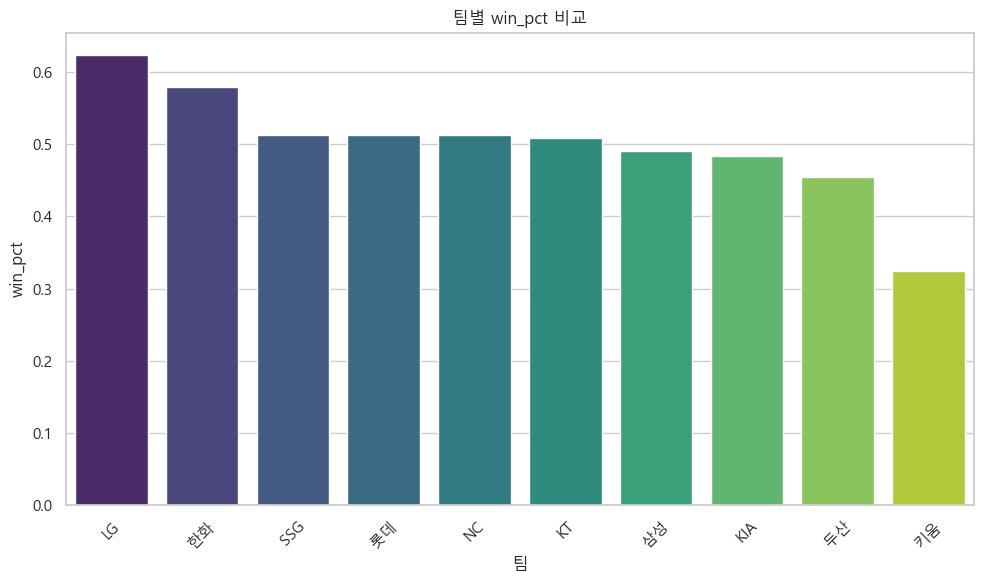

C:\Users\NT551_11TH\AppData\Local\Temp\ipykernel_11776\3781887944.py:43: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x="team", y=metric, palette="viridis")


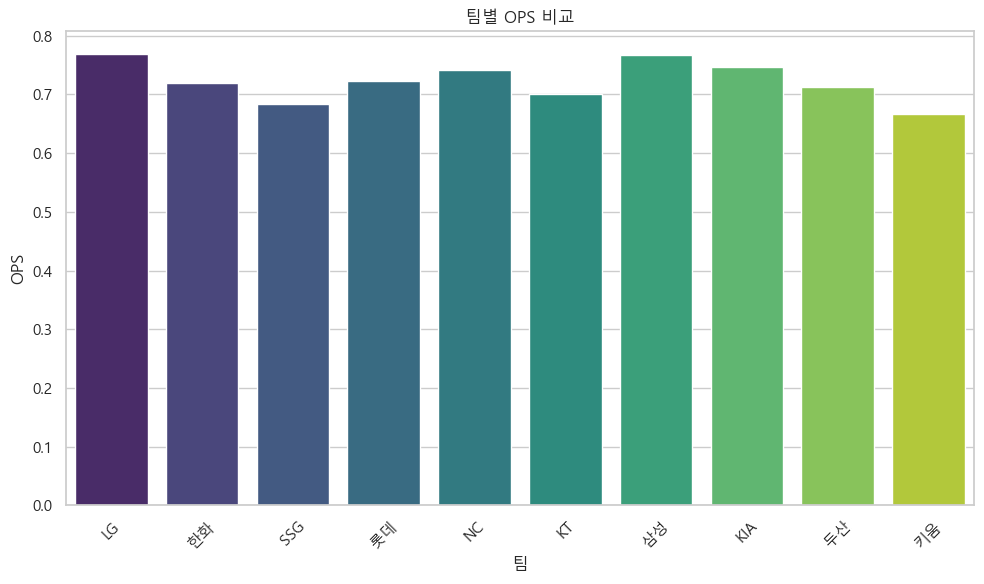

C:\Users\NT551_11TH\AppData\Local\Temp\ipykernel_11776\3781887944.py:43: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x="team", y=metric, palette="viridis")


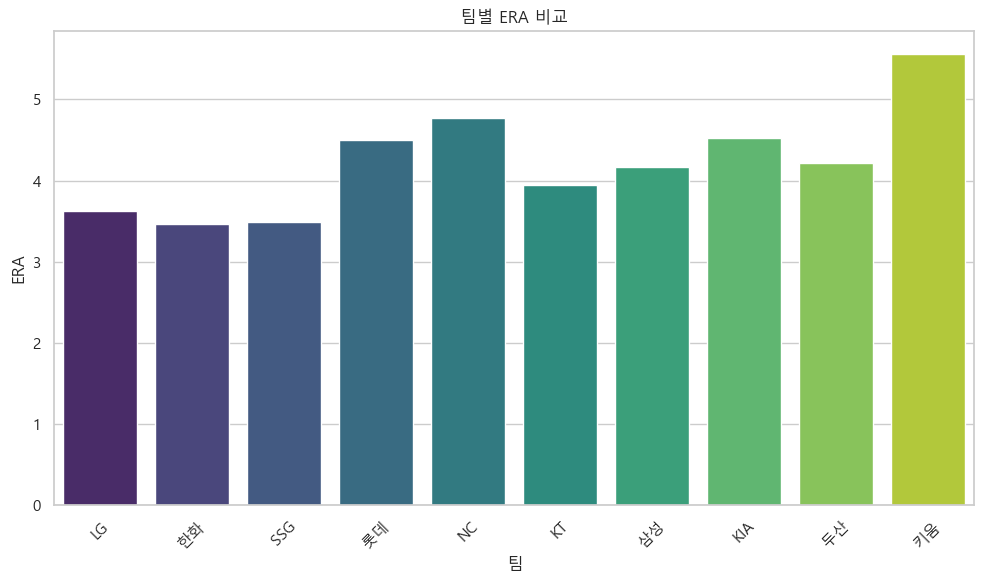

C:\Users\NT551_11TH\AppData\Local\Temp\ipykernel_11776\3781887944.py:43: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x="team", y=metric, palette="viridis")


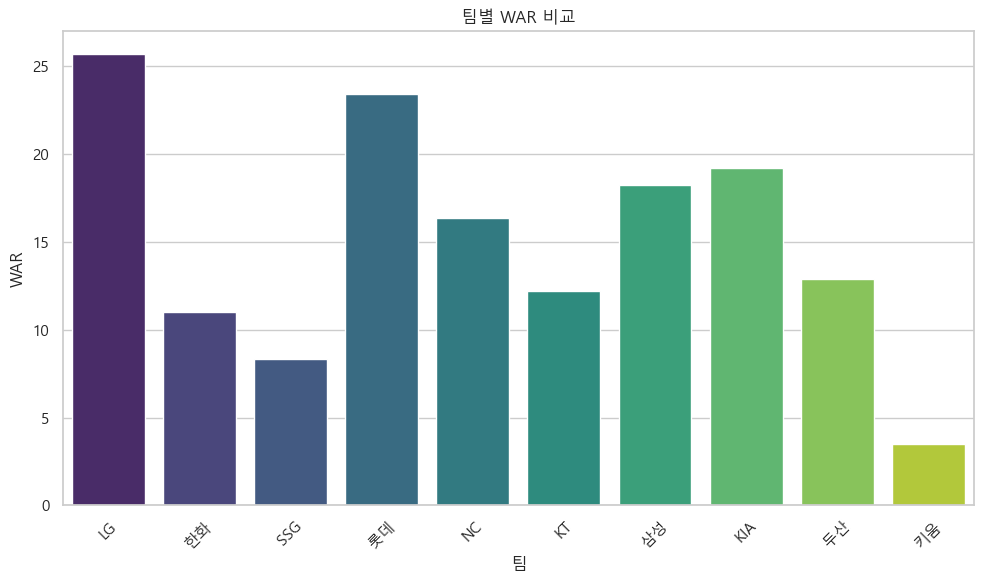

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import platform
import matplotlib

# ✅ 한글 폰트 설정
if platform.system() == 'Windows':
    matplotlib.rc('font', family='Malgun Gothic')
elif platform.system() == 'Darwin':  # macOS
    matplotlib.rc('font', family='AppleGothic')
else:
    matplotlib.rc('font', family='NanumGothic')  # Linux 환경

plt.rcParams['axes.unicode_minus'] = False  # 마이너스 깨짐 방지

# 1. CSV 파일 불러오기
stats_df = pd.read_csv(r"C:\Users\NT551_11TH\Downloads\team_stats_2025.csv",encoding="cp949")
salary_df = pd.read_csv(r"C:\Users\NT551_11TH\Downloads\team_salary_2025.csv",encoding="cp949")

# 🔗 병합
df = pd.merge(stats_df, salary_df, on="team")

# 🎯 분석 지표
performance_metrics = ["win_pct", "OPS", "ERA", "WAR"]
salary_metrics = ["salary_total", "salary_avg"]

# 📊 산점도: 연봉 vs 성적 지표
for salary in salary_metrics:
    for metric in performance_metrics:
        plt.figure(figsize=(8, 6))
        sns.scatterplot(data=df, x=salary, y=metric, hue="team", s=100)
        plt.title(f"{salary} vs {metric}")
        plt.xlabel(salary)
        plt.ylabel(metric)
        plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
        plt.tight_layout()
        plt.show()

# 📈 막대그래프: 팀별 성적 지표
for metric in performance_metrics:
    plt.figure(figsize=(10, 6))
    sns.barplot(data=df, x="team", y=metric, palette="viridis")
    plt.title(f"팀별 {metric} 비교")
    plt.xlabel("팀")
    plt.ylabel(metric)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


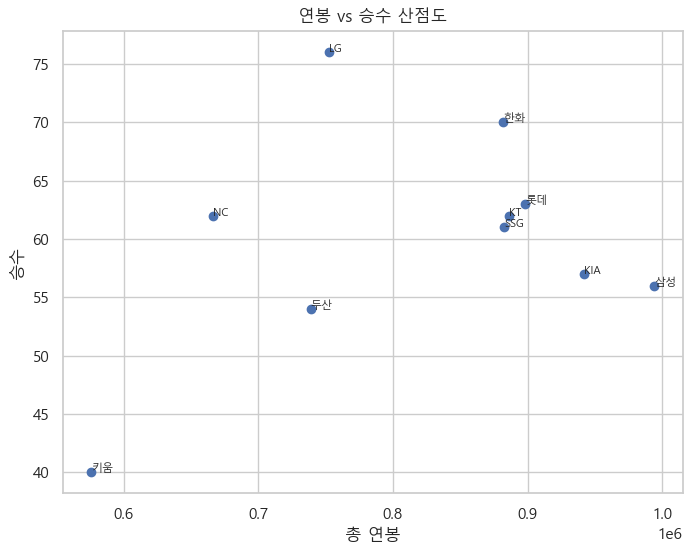

<Figure size 640x480 with 0 Axes>

In [36]:
# (1) 연봉 vs 승수
plt.figure(figsize=(8,6))
plt.scatter(df["salary_total"], df["wins"])
for i, row in df.iterrows():
    plt.text(row["salary_total"], row["wins"], row["team"], fontsize=8)
plt.xlabel("총 연봉")
plt.ylabel("승수")
plt.title("연봉 vs 승수 산점도")
plt.show()
plt.tight_layout()

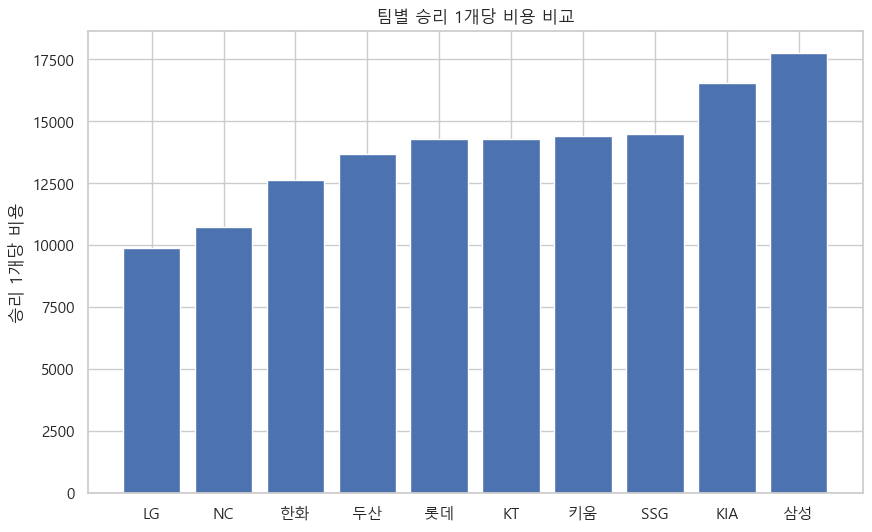

In [37]:
# 승리 비용 막대그래프
df_sorted = df.sort_values("Cost_per_Win")
plt.figure(figsize=(10,6))
plt.bar(df_sorted["team"], df_sorted["Cost_per_Win"])
plt.ylabel("승리 1개당 비용")
plt.title("팀별 승리 1개당 비용 비교")
plt.show()

승리당 비용 기준 가장 돈을 못 쓴 팀: 삼성 (13,503원)
WAR당 비용 기준 가장 돈을 못 쓴 팀: 키움 (109,099원)


C:\Users\NT551_11TH\AppData\Local\Temp\ipykernel_6616\1658624512.py:61: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=summary.sort_values("Cost_per_Win", ascending=False), x="team", y="Cost_per_Win", palette="rocket")


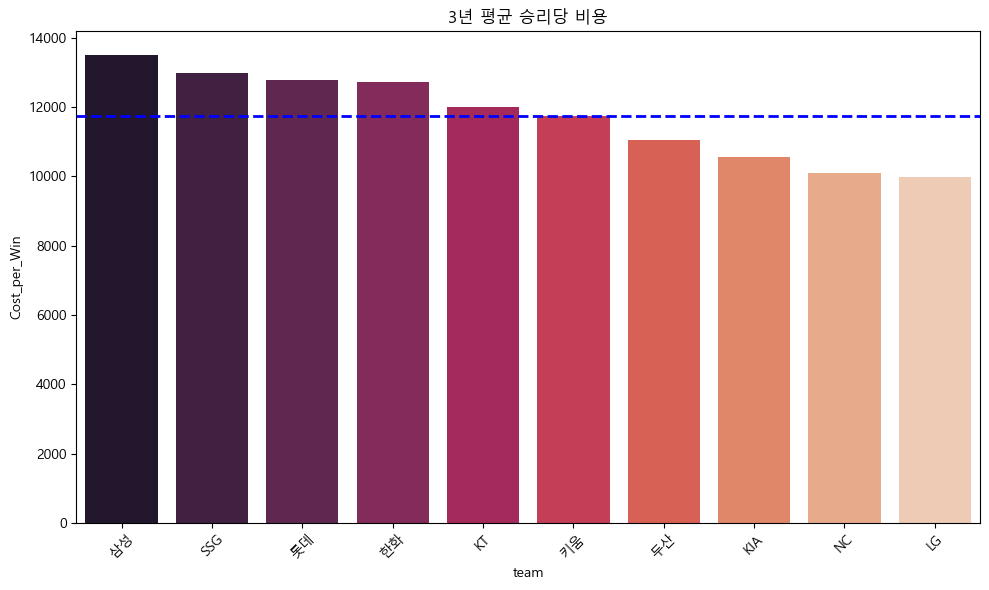

C:\Users\NT551_11TH\AppData\Local\Temp\ipykernel_6616\1658624512.py:70: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=summary.sort_values("Cost_per_WAR", ascending=False), x="team", y="Cost_per_WAR", palette="mako")


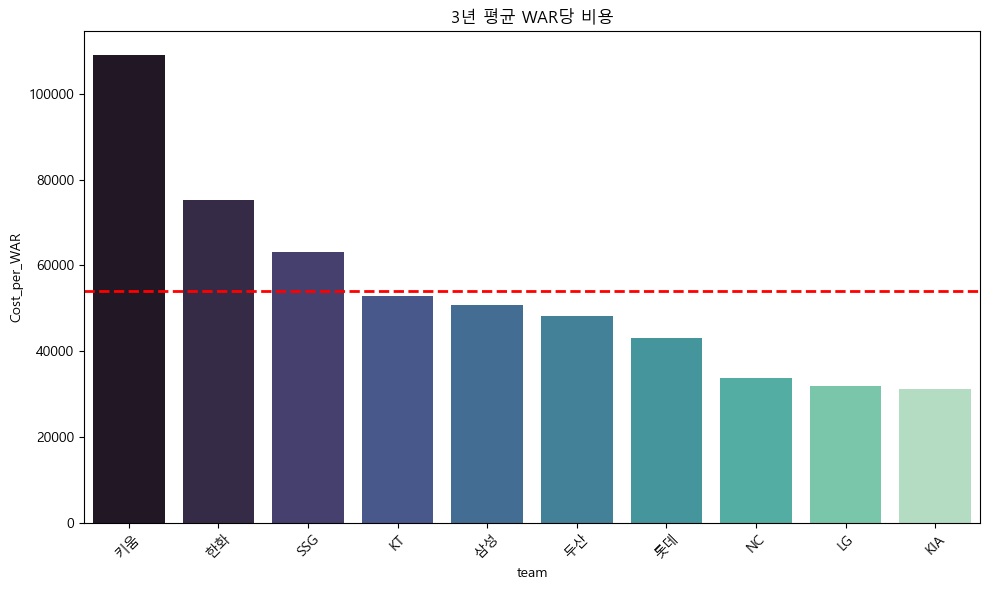

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 📥 연도별 데이터 불러오기
stats_2023 = pd.read_csv(r"C:\Users\NT551_11TH\Downloads\team_stats_2023.csv", encoding="cp949")
salary_2023 = pd.read_csv(r"C:\Users\NT551_11TH\Downloads\team_salary_2023.csv", encoding="cp949")

stats_2024 = pd.read_csv(r"C:\Users\NT551_11TH\Downloads\team_stats_2024.csv", encoding="cp949")
salary_2024 = pd.read_csv(r"C:\Users\NT551_11TH\Downloads\team_salary_2024.csv", encoding="cp949")

stats_2025 = pd.read_csv(r"C:\Users\NT551_11TH\Downloads\team_stats_2025.csv", encoding="cp949")
salary_2025 = pd.read_csv(r"C:\Users\NT551_11TH\Downloads\team_salary_2025.csv", encoding="cp949")

# 🧹 숫자형 변환
def clean_salary(df):
    df["salary_total"] = pd.to_numeric(df["salary_total"].str.replace(",", ""), errors="coerce")
    return df

salary_2023 = clean_salary(salary_2023)
salary_2024 = clean_salary(salary_2024)
salary_2025 = clean_salary(salary_2025)

# 🔗 병합 및 연도 추가
merged_2023 = pd.merge(stats_2023, salary_2023, on="team")
merged_2023["year"] = 2023

merged_2024 = pd.merge(stats_2024, salary_2024, on="team")
merged_2024["year"] = 2024

merged_2025 = pd.merge(stats_2025, salary_2025, on="team")
merged_2025["year"] = 2025

# 🔗 전체 통합
all_df = pd.concat([merged_2023, merged_2024, merged_2025])

# 📊 팀별 3년 평균 계산
summary = all_df.groupby("team").agg({
    "salary_total": "sum",
    "wins": "sum",
    "WAR": "sum"
}).reset_index()

summary["avg_salary"] = summary["salary_total"] / 3
summary["avg_wins"] = summary["wins"] / 3
summary["avg_WAR"] = summary["WAR"] / 3

# 💰 비용 효율성 계산
summary["Cost_per_Win"] = summary["avg_salary"] / summary["avg_wins"]
summary["Cost_per_WAR"] = summary["avg_salary"] / summary["avg_WAR"]

# 🥵 돈을 가장 못 쓴 팀
worst_win_team = summary.sort_values("Cost_per_Win", ascending=False).iloc[0]
worst_war_team = summary.sort_values("Cost_per_WAR", ascending=False).iloc[0]

print(f"승리당 비용 기준 가장 돈을 못 쓴 팀: {worst_win_team['team']} ({int(worst_win_team['Cost_per_Win']):,}원)")
print(f"WAR당 비용 기준 가장 돈을 못 쓴 팀: {worst_war_team['team']} ({int(worst_war_team['Cost_per_WAR']):,}원)")

# 📈 시각화
plt.figure(figsize=(10, 6))
sns.barplot(data=summary.sort_values("Cost_per_Win", ascending=False), x="team", y="Cost_per_Win", palette="rocket")
avg_win_cost = summary["Cost_per_Win"].mean()
plt.axhline(y=avg_win_cost, color='blue', linestyle='--', linewidth=2, label=f'평균: {avg_win_cost:,.0f}원')
plt.title("3년 평균 승리당 비용")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
sns.barplot(data=summary.sort_values("Cost_per_WAR", ascending=False), x="team", y="Cost_per_WAR", palette="mako")
avg_war_cost = summary["Cost_per_WAR"].mean()
plt.axhline(y=avg_war_cost, color='red', linestyle='--', linewidth=2, label=f'평균: {avg_war_cost:,.0f}원')
plt.title("3년 평균 WAR당 비용")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


C:\Users\NT551_11TH\AppData\Local\Temp\ipykernel_6616\2341273904.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="postseason", y="salary_total", palette="Set2")


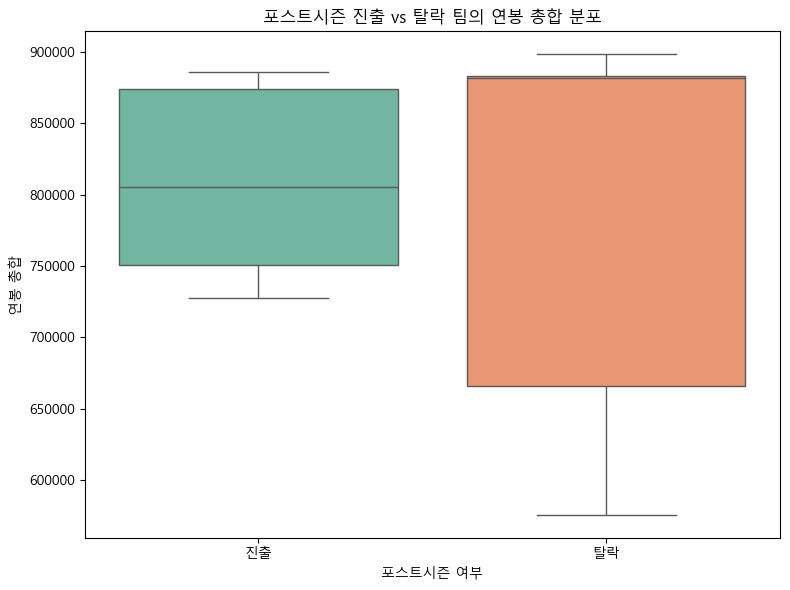

C:\Users\NT551_11TH\AppData\Local\Temp\ipykernel_6616\2341273904.py:43: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="postseason", y="salary_avg", palette="Set3")


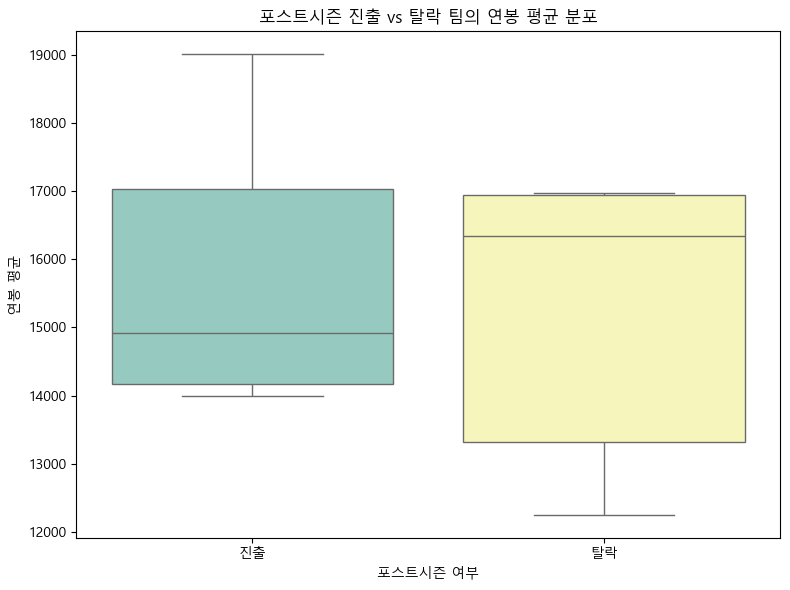

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import platform
import matplotlib

# ✅ 한글 폰트 설정
if platform.system() == 'Windows':
    matplotlib.rc('font', family='Malgun Gothic')
elif platform.system() == 'Darwin':
    matplotlib.rc('font', family='AppleGothic')
else:
    matplotlib.rc('font', family='NanumGothic')
plt.rcParams['axes.unicode_minus'] = False

#  데이터 불러오기
stats_df = pd.read_csv(r"C:\Users\NT551_11TH\Downloads\team_stats_2024.csv",encoding="cp949")
salary_df = pd.read_csv(r"C:\Users\NT551_11TH\Downloads\team_salary_2024.csv",encoding="cp949")

# 🔗 병합
df = pd.merge(stats_df, salary_df, on="team")

# 💰 숫자형 변환
df["salary_total"] = pd.to_numeric(df["salary_total"].str.replace(',', ''), errors="coerce")
df["salary_avg"] = pd.to_numeric(df["salary_avg"].str.replace(',', ''), errors="coerce")
df["win_pct"] = pd.to_numeric(df["win_pct"], errors="coerce")

# 🏆 승률 기준 순위 계산
df = df.sort_values(by="win_pct", ascending=False).reset_index(drop=True)
df["postseason"] = ["진출" if i < 5 else "탈락" for i in df.index]

# 📊 박스플롯: 연봉 총합
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x="postseason", y="salary_total", palette="Set2")
plt.title("포스트시즌 진출 vs 탈락 팀의 연봉 총합 분포")
plt.xlabel("포스트시즌 여부")
plt.ylabel("연봉 총합")
plt.tight_layout()
plt.show()

# 📊 박스플롯: 연봉 평균
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x="postseason", y="salary_avg", palette="Set3")
plt.title("포스트시즌 진출 vs 탈락 팀의 연봉 평균 분포")
plt.xlabel("포스트시즌 여부")
plt.ylabel("연봉 평균")
plt.tight_layout()
plt.show()
